The notebook is divided into 3 sections and each section describes a specific type of bias, as listed below:
- Section #1: Representation of the real world population
- Section #2: Underrepresented populations
- [TO BE REMOVED] Section #0: Label Distribution for Protected Attribute Groups Over Time
- Section #3: Label Distribution for Protected Attribute Groups
- Section #4: Label distribution for missing values of protected attributes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

plt.style.use('ggplot')

## Data representation biases before preprocessing

In [2]:
df = pd.read_csv('Final_CSVs/daily_fitbit_sema_df_unprocessed.csv')
df

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,daily_temperature_variation,badgeType,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,-1.788325,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,-2.462709,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,-2.385801,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,-2.124199,['LIFETIME_DISTANCE'],...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,-2.396873,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7406,7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7407,7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7408,7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'nightly_temperature', 'nremhr', 'rmssd',
       'spo2', 'full_sleep_breathing_rate', 'daily_temperature_variation',
       'badgeType', 'calories', 'filteredDemographicVO2Max', 'distance',
       'activityType', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'mindfulness_session', 'scl_avg', 'resting_hr', 'sleep_duration',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'step_goal', 'min_goal', 'max_goal', 'step_goal_label',
       'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS',
       'TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME_OFFICE

In [4]:
df["labels"] = np.where(df['TENSE/ANXIOUS']==1, 1, np.where(df['ALERT']==1,1, np.where(df['SAD']==1,1, 0)))
df["labels"].value_counts()

0    6571
1     839
Name: labels, dtype: int64

In [5]:
df = df[['id', 'date', 'gender', 'age', 'labels']]
df

,id,date,gender,age,labels
0,621e2e8e67b776a24055b564,2021-05-24,MALE,<30,0
1,621e2e8e67b776a24055b564,2021-05-25,MALE,<30,0
2,621e2e8e67b776a24055b564,2021-05-26,MALE,<30,0
3,621e2e8e67b776a24055b564,2021-05-27,MALE,<30,0
4,621e2e8e67b776a24055b564,2021-05-28,MALE,<30,0
...,...,...,...,...,...
7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,0
7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,0
7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,0
7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,0


In [6]:
df['id'].nunique()

71

### Section #1: Representation of the real world population
Is the dataset sample representative of the real-world population?

#### Gender Ratio

In [7]:
# real population distribution in 2021 (LifeSnaps data collection year) in Europe
real_distribution = {
    "gender": {'MALE': 48.16, 'FEMALE': 51.84}, # 0: male, 1: female (https://www.statista.com/statistics/755225/population-of-europe-by-gender/)
}
real_distribution

{'gender': {'MALE': 48.16, 'FEMALE': 51.84}}

In [8]:
# dataset population distribution in 2021 (LifeSnaps data collection year) in Europe
lifesnaps_distribution = {
    "gender": {'MALE': 0, 'FEMALE': 1}, # 0: male, 1: female
}

# unique users
df_p1 = df.groupby(['id']).first().reset_index()

for attribute in real_distribution:
    counts = df_p1[attribute].value_counts()
    lifesnaps_distribution.get(attribute).update(counts)
lifesnaps_distribution

{'gender': {'MALE': 42, 'FEMALE': 27}}

In [9]:
# compute the ratio for the gender
real_ratio = list(real_distribution.get('gender').values())[0] / list(real_distribution.get('gender').values())[1]
dataset_ratio = list(lifesnaps_distribution.get('gender').values())[0] / list(lifesnaps_distribution.get('gender').values())[1]
real_ratio, dataset_ratio

(0.9290123456790123, 1.5555555555555556)

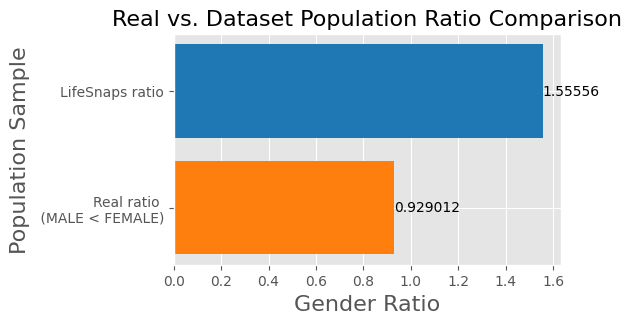

In [10]:
y = ['Real ratio \n (MALE < FEMALE)', 'LifeSnaps ratio']
x = [real_ratio, dataset_ratio]
f, ax = plt.subplots()
f.set_figwidth(5)
f.set_figheight(3)
bars = ax.barh(y,x, color=["#ff7f0e", "#1f77b4"])
ax.bar_label(bars)
plt.ylabel('Population Sample', fontsize=16)
plt.xlabel('Gender Ratio', fontsize=16)
plt.title('Real vs. Dataset Population Ratio Comparison', fontsize=16)
plt.savefig('Images/LifeSnaps1.png', bbox_inches='tight')
plt.show()

#### Age Ratio

In [11]:
# real population distribution in 2021 (LifeSnaps data collection year) in Europe
real_distribution = {
    "age": {'<30': 31.79, '>=30': 68.21}, # 0: <30, 1: >=30 (https://www.census.gov/data-tools/demo/idb/#/dashboard?COUNTRY_YEAR=2021&COUNTRY_YR_ANIM=2021&CCODE_SINGLE=*W&CCODE=*W)
}
real_distribution

{'age': {'<30': 31.79, '>=30': 68.21}}

In [12]:
# dataset population distribution in 2021 (LifeSnaps data collection year) in the world
lifesnaps_distribution = {
    "age": {'<30': 0, '>=30': 1}, # 0: <30, 1: >=30
}

# unique users
df_p1 = df.groupby(['id']).first().reset_index()

for attribute in real_distribution:
    counts = df_p1[attribute].value_counts()
    lifesnaps_distribution.get(attribute).update(counts)
lifesnaps_distribution

{'age': {'<30': 37, '>=30': 31}}

In [13]:
# compute the ratio for the age
real_ratio = list(real_distribution.get('age').values())[0] / list(real_distribution.get('age').values())[1]
dataset_ratio = list(lifesnaps_distribution.get('age').values())[0] / list(lifesnaps_distribution.get('age').values())[1]
real_ratio, dataset_ratio

(0.4660606949127694, 1.1935483870967742)

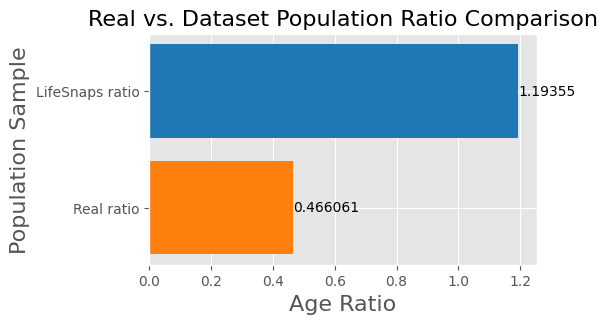

In [14]:
y = ['Real ratio', 'LifeSnaps ratio']
x = [real_ratio, dataset_ratio]
f, ax = plt.subplots()
f.set_figwidth(5)
f.set_figheight(3)
bars = ax.barh(y,x, color=["#ff7f0e", "#1f77b4"])
ax.bar_label(bars)
plt.ylabel('Population Sample', fontsize=16)
plt.xlabel('Age Ratio', fontsize=16)
plt.title('Real vs. Dataset Population Ratio Comparison', fontsize=16)
plt.savefig('images/LifeSnaps2.png', bbox_inches='tight')
plt.show()

### Section #2: Underrepresented populations
Are there underrepresented populations in the dataset?

In [15]:
# number of samples per protected attribute
representation_df = pd.DataFrame(columns=['Class', 'Samples', 'Attribute'])
for attribute in ['gender', 'age']:
    attribute_df = df_p1[attribute].value_counts().reset_index(drop=False)
    attribute_name = attribute_df.columns[0]
    attribute_df.rename(columns={attribute_df.columns[0]: 'Class', attribute_df.columns[1]: 'Samples'}, inplace=True)
    attribute_df['Attribute'] = attribute
    representation_df = pd.concat([representation_df, attribute_df], axis=0)
representation_df

,Class,Samples,Attribute
0,MALE,42,gender
1,FEMALE,27,gender
0,<30,37,age
1,>=30,31,age


In [16]:
# Data setup
representation_df = pd.DataFrame({
    'Class': ['MALE', 'FEMALE', '<30', '>=30'],
    'Samples': [42, 27, 37, 31],
    'Attribute': ['gender', 'gender', 'age', 'age']
})
representation_df

,Class,Samples,Attribute
0,MALE,42,gender
1,FEMALE,27,gender
2,<30,37,age
3,>=30,31,age


C:\Users\alexi\AppData\Local\Temp\ipykernel_14992\2289470910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e"], aspect=.5)
C:\Users\alexi\AppData\Local\Temp\ipykernel_14992\2289470910.py:2: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e"], aspect=.5)


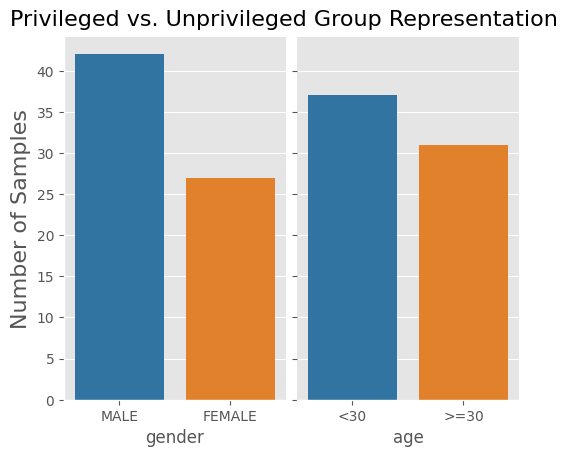

In [17]:
# create the plot to visualize the samples per class per protected attribute
g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e"], aspect=.5)
g.set_titles("{col_name}", fontsize=16)
g.set_ylabels('Number of Samples', fontsize=16)
plt.suptitle("Privileged vs. Unprivileged Group Representation", fontsize=16)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
# for c in g.axes.flat[0].containers:
#     labels = [int(v.get_height()) for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')
plt.subplots_adjust(wspace=0.05, bottom=0.2, left=0.06)
plt.savefig('Images/LifeSnaps3.png', bbox_inches='tight')
plt.show()

In [18]:
# examine the representation on the LifeSnaps dataset based on the intersectionality of age and gender
df_intersectionality = pd.DataFrame(df_p1.groupby(['age', 'gender']).count().reset_index())
df_intersectionality = df_intersectionality[['age', 'gender', 'id']]
df_intersectionality.rename(columns={'id': 'Samples'}, inplace=True)
df_intersectionality['Group'] = ['FEMALE <30', 'MALE <30', 'FEMALE >=30', 'MALE >=30']
df_intersectionality.drop(columns=['age', 'gender'], inplace=True)
df_intersectionality

,Samples,Group
0,15,FEMALE <30
1,22,MALE <30
2,12,FEMALE >=30
3,19,MALE >=30


C:\Users\alexi\AppData\Local\Temp\ipykernel_14992\2104764771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_intersectionality, x="Group", y="Samples", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], aspect=.8)


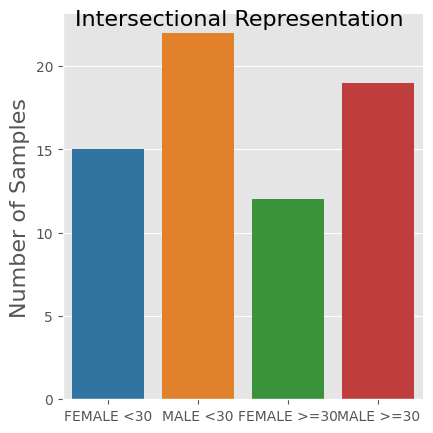

In [19]:
# create the plot to visualize the samples per class per protected attribute
# g = sns.catplot(data=df_intersectionality, x="Group", y="Samples", kind='bar', sharex=False, palette=['#B40426', '#3B4CC0', '#C03B8E', '#3BC06D'], aspect=.8)
g = sns.catplot(data=df_intersectionality, x="Group", y="Samples", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], aspect=.8)
g.set_titles("{col_name}", fontsize=16)
g.set_ylabels('Number of Samples', fontsize=16)
plt.suptitle("Intersectional Representation", fontsize=16)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
# for c in g.axes.flat[0].containers:
#     labels = [int(v.get_height()) for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')
plt.subplots_adjust(wspace=0.05, bottom=0.2, left=0.06)
plt.savefig('images/LifeSnaps4.png', bbox_inches='tight')
plt.show()

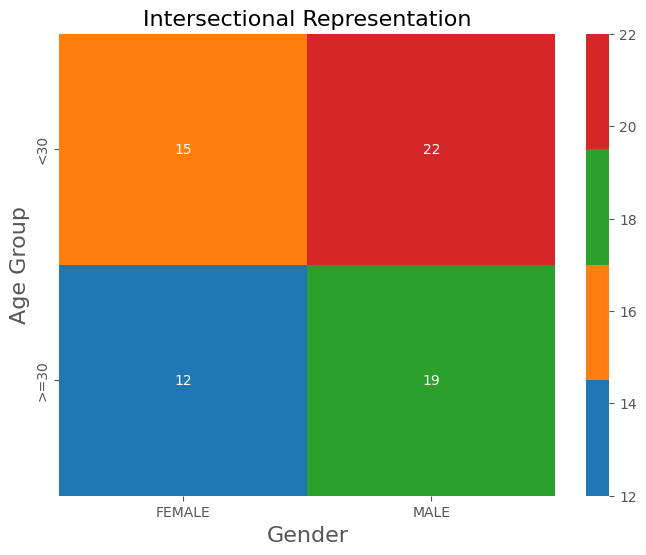

In [20]:
from matplotlib.colors import ListedColormap

data = {
    'age': ['<30', '<30', '>=30', '>=30'],
    'gender': ['FEMALE', 'MALE', 'FEMALE', 'MALE'],
    'Samples': [15, 22, 12, 19]  # Sample counts for each combination of age and gender
}

# Create a DataFrame from the sample data
df_intersectionality = pd.DataFrame(data)

# Pivot the DataFrame to have age and gender as rows and columns respectively
pivot_df = df_intersectionality.pivot(index='age', columns='gender', values='Samples')

# Define the colors for the heatmap
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create the heatmap with the specified colors
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap=ListedColormap(custom_palette), fmt='d')
plt.title('Intersectional Representation', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Age Group', fontsize=16)
plt.savefig('Images/LifeSnaps5.png', bbox_inches='tight')
plt.show()


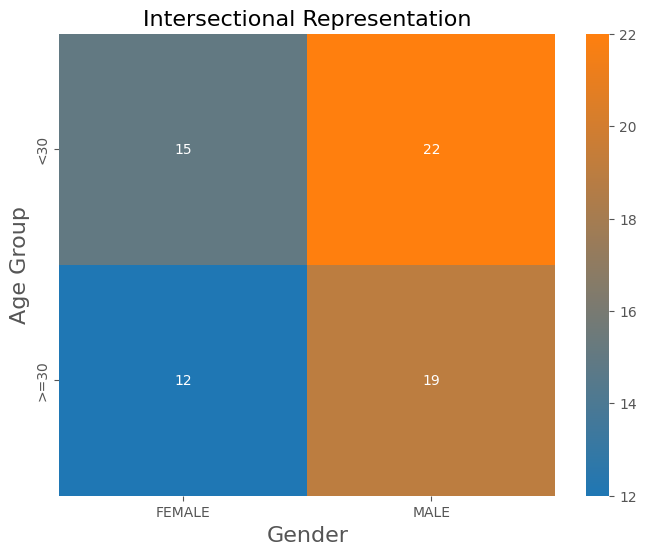

In [21]:
import matplotlib.colors as mcolors

data = {
    'age': ['<30', '<30', '>=30', '>=30'],
    'gender': ['FEMALE', 'MALE', 'FEMALE', 'MALE'],
    'Samples': [15, 22, 12, 19]  # Sample counts for each combination of age and gender
}

# Create a DataFrame from the sample data
df_intersectionality = pd.DataFrame(data)

# Pivot the DataFrame to have age and gender as rows and columns respectively
pivot_df = df_intersectionality.pivot(index='age', columns='gender', values='Samples')

# Define your start and end colors
start_color = "#1f77b4" 
end_color = "#ff7f0e"

# Create a custom colormap using LinearSegmentedColormap
colors = [start_color, end_color]
cmap_name = 'custom_gradient'
n_bins = 1000  # Use a large number of bins for smooth color transition
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create the heatmap using the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap=cmap, fmt='d')
plt.title('Intersectional Representation', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Age Group', fontsize=16)
plt.savefig('Images/LifeSnaps5.png', bbox_inches='tight')
plt.show()


### [TO BE REMOVED] Section #0: Label Distribution for Protected Attribute Groups Over Time
What is the distribution of the label for each value of the protected attribute over time?

#### Gender

In [99]:
# Filter data for summer period
df = df[df['date'] < '2021-08-01']

# Define genders
genders = ['MALE', 'FEMALE']

# Create an empty DataFrame to store results
df_p3 = pd.DataFrame(columns=['Gender', 'Date', 'Stressed_Count'])

# Iterate over each gender
for gender in genders:
    # Filter data for the current gender
    df_gender = df[df['gender'] == gender]
    
    # Group by date and count the number of people stressed (labels == 1)
    df_gender = pd.DataFrame(df_gender.groupby('date')['labels'].apply(lambda x: (x == 1).sum()).reset_index())
    
    # Rename columns
    df_gender.columns = ['Date', 'Stressed_Count']
    
    # Add gender column
    df_gender['Gender'] = gender
    
    # Reorder columns
    df_gender = df_gender[['Gender', 'Date', 'Stressed_Count']]
    
    # Append data for the current gender to the result DataFrame
    df_p3 = pd.concat([df_p3, df_gender], ignore_index=True)

# Display the result DataFrame
print(df_p3)


     Gender        Date Stressed_Count
0      MALE  2021-05-24              2
1      MALE  2021-05-25              9
2      MALE  2021-05-26              6
3      MALE  2021-05-27              9
4      MALE  2021-05-28              8
..      ...         ...            ...
133  FEMALE  2021-07-27              0
134  FEMALE  2021-07-28              0
135  FEMALE  2021-07-29              0
136  FEMALE  2021-07-30              0
137  FEMALE  2021-07-31              0

[138 rows x 3 columns]


In [100]:
average_values = df_p3.groupby(['Gender'])['Stressed_Count'].mean().to_frame()
average_values

,Stressed_Count
Gender,
FEMALE,2.362319
MALE,4.652174


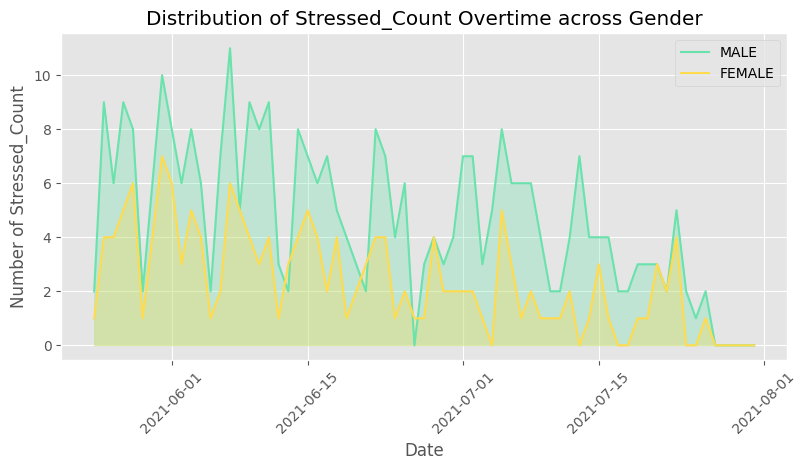

In [101]:
# Filter data for male and female genders
df_male = df_p3[df_p3['Gender'] == 'MALE'].copy()
df_female = df_p3[df_p3['Gender'] == 'FEMALE'].copy()

# Convert 'Date' column to datetime data type
df_male['Date'] = pd.to_datetime(df_male['Date'])
df_female['Date'] = pd.to_datetime(df_female['Date'])

# Convert 'Stressed_Count' column to numeric type
df_male['Stressed_Count'] = pd.to_numeric(df_male['Stressed_Count'], errors='coerce')
df_female['Stressed_Count'] = pd.to_numeric(df_female['Stressed_Count'], errors='coerce')

# Plotting
plt.figure(figsize=(8.2, 4.8))
plt.plot(df_male['Date'], df_male['Stressed_Count'], linestyle='-', color='#6ae2ac', label='MALE')
plt.fill_between(df_male['Date'], df_male['Stressed_Count'], alpha=0.3, color='#6ae2ac')

plt.plot(df_female['Date'], df_female['Stressed_Count'], linestyle='-', color='#ffdb4d', label='FEMALE')
plt.fill_between(df_female['Date'], df_female['Stressed_Count'], alpha=0.3, color='#ffdb4d')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Stressed_Count')
plt.title('Distribution of Stressed_Count Overtime across Gender')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('images/distribution_after_gender.png', bbox_inches='tight')
plt.show()


#### Age

In [102]:
# Filter data for summer period
df = df[df['date'] < '2021-08-01']

# Define ages
ages = ['<30', '>=30']

# Create an empty DataFrame to store results
df_p3 = pd.DataFrame(columns=['Age', 'Date', 'Stressed_Count'])

# Iterate over each age
for age in ages:
    # Filter data for the current age
    df_age = df[df['age'] == age]
    
    # Group by date and count the number of people stressed (labels == 1)
    df_age = pd.DataFrame(df_age.groupby('date')['labels'].apply(lambda x: (x == 1).sum()).reset_index())
    
    # Rename columns
    df_age.columns = ['Date', 'Stressed_Count']
    
    # Add age column
    df_age['Age'] = age
    
    # Reorder columns
    df_age = df_age[['Age', 'Date', 'Stressed_Count']]
    
    # Append data for the current age to the result DataFrame
    df_p3 = pd.concat([df_p3, df_age], ignore_index=True)

# Display the result DataFrame
print(df_p3)


      Age        Date Stressed_Count
0     <30  2021-05-24              3
1     <30  2021-05-25              7
2     <30  2021-05-26              4
3     <30  2021-05-27              7
4     <30  2021-05-28              7
..    ...         ...            ...
133  >=30  2021-07-27              0
134  >=30  2021-07-28              0
135  >=30  2021-07-29              0
136  >=30  2021-07-30              0
137  >=30  2021-07-31              0

[138 rows x 3 columns]


In [103]:
average_values = df_p3.groupby(['Age'])['Stressed_Count'].mean().to_frame()
average_values

,Stressed_Count
Age,
<30,3.724638
>=30,3.289855


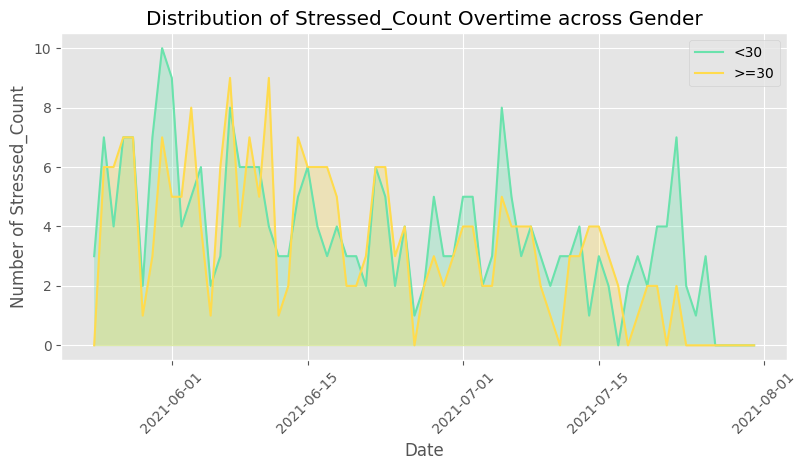

In [104]:
# Assuming df_p3 is your DataFrame containing data for both genders

# Filter data for young and old
df_u30 = df_p3[df_p3['Age'] == '<30'].copy()
df_o30 = df_p3[df_p3['Age'] == '>=30'].copy()

# Convert 'Date' column to datetime data type
df_u30['Date'] = pd.to_datetime(df_u30['Date'])
df_o30['Date'] = pd.to_datetime(df_o30['Date'])

# Convert 'Stressed_Count' column to numeric type
df_u30['Stressed_Count'] = pd.to_numeric(df_u30['Stressed_Count'], errors='coerce')
df_o30['Stressed_Count'] = pd.to_numeric(df_o30['Stressed_Count'], errors='coerce')

# Plotting
plt.figure(figsize=(8.2, 4.8))
plt.plot(df_u30['Date'], df_u30['Stressed_Count'], linestyle='-', color='#6ae2ac', label='<30')
plt.fill_between(df_u30['Date'], df_u30['Stressed_Count'], alpha=0.3, color='#6ae2ac')

plt.plot(df_o30['Date'], df_o30['Stressed_Count'], linestyle='-', color='#ffdb4d', label='>=30')
plt.fill_between(df_o30['Date'], df_o30['Stressed_Count'], alpha=0.3, color='#ffdb4d')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Stressed_Count')
plt.title('Distribution of Stressed_Count Overtime across Gender')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('images/distribution_after_gender.png', bbox_inches='tight')
plt.show()


### Section #3: Label Distribution Across Protected Attribute Groups

Are there are any disparities in the distribution of the target label (stressed vs. not stressed) across different groups of the protected attribute (e.g., gender, age)?

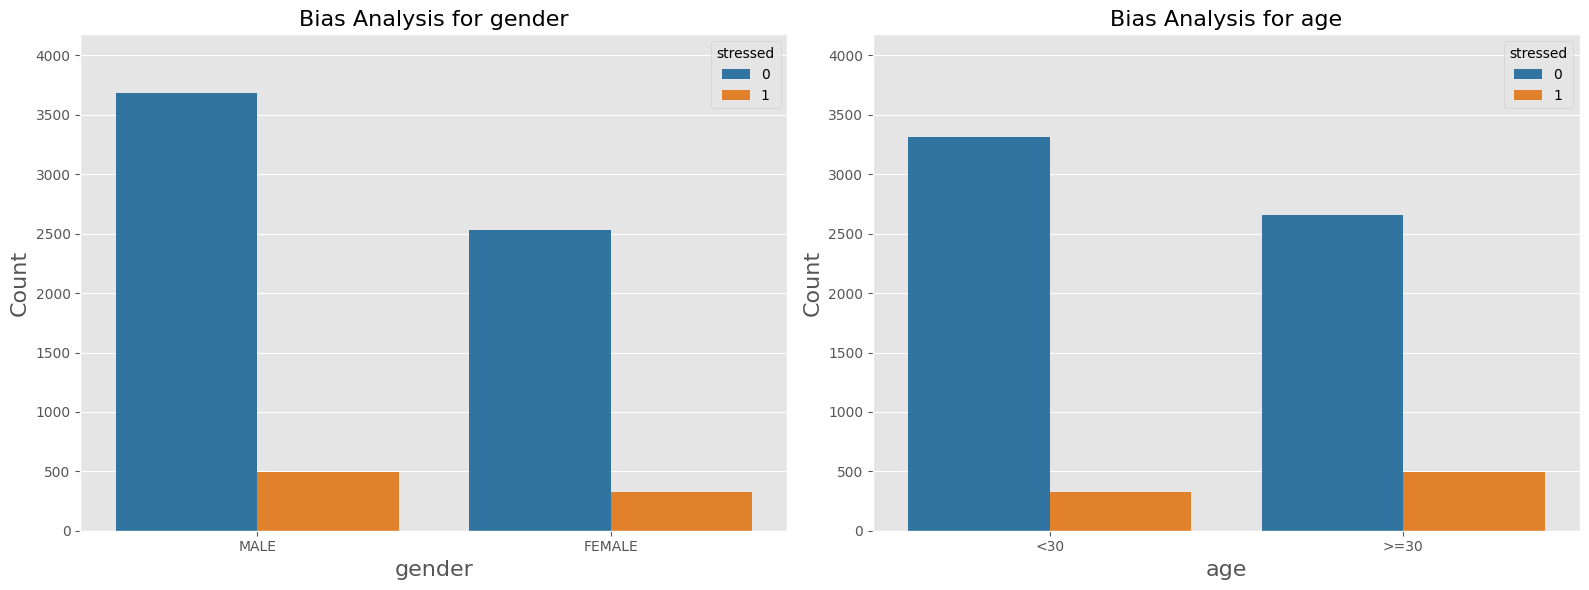

In [22]:
# Define the columns for analysis
columns_for_bias_analysis = ['gender', 'age']

# Define the target label column
target_label = 'labels'

# Define the palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Initialize y-axis limits
y_max = 0

# Visualize bias in each column
for i, column in enumerate(columns_for_bias_analysis):
    sns.countplot(x=column, hue=target_label, data=df, ax=axes[i], palette=custom_palette)
    axes[i].set_title('Bias Analysis for {}'.format(column), fontsize=16)
    axes[i].set_xlabel(column, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].legend(title='stressed')
    
    # Update y-axis limits
    current_max = df[column].value_counts().max()
    if current_max > y_max:
        y_max = current_max

# Set the same y-axis limits for both plots
for ax in axes:
    ax.set_ylim(0, y_max)

plt.tight_layout()
plt.savefig('Images/LifeSnaps6.png', bbox_inches='tight')
plt.show()

In [23]:
# Define the protected attribute and target label columns
protected_attribute = 'gender'
target_label = 'labels'

# Calculate label distribution for each group of the protected attribute
label_distribution = df.groupby(protected_attribute)[target_label].value_counts(normalize=True).unstack()
label_distribution

labels,0,1
gender,,
FEMALE,0.885045,0.114955
MALE,0.882001,0.117999


In [24]:
# Define the protected attribute and target label columns
protected_attribute = 'age'
target_label = 'labels'

# Calculate label distribution for each group of the protected attribute
label_distribution = df.groupby(protected_attribute)[target_label].value_counts(normalize=True).unstack()
label_distribution

labels,0,1
age,,
<30,0.910489,0.089511
>=30,0.843056,0.156944


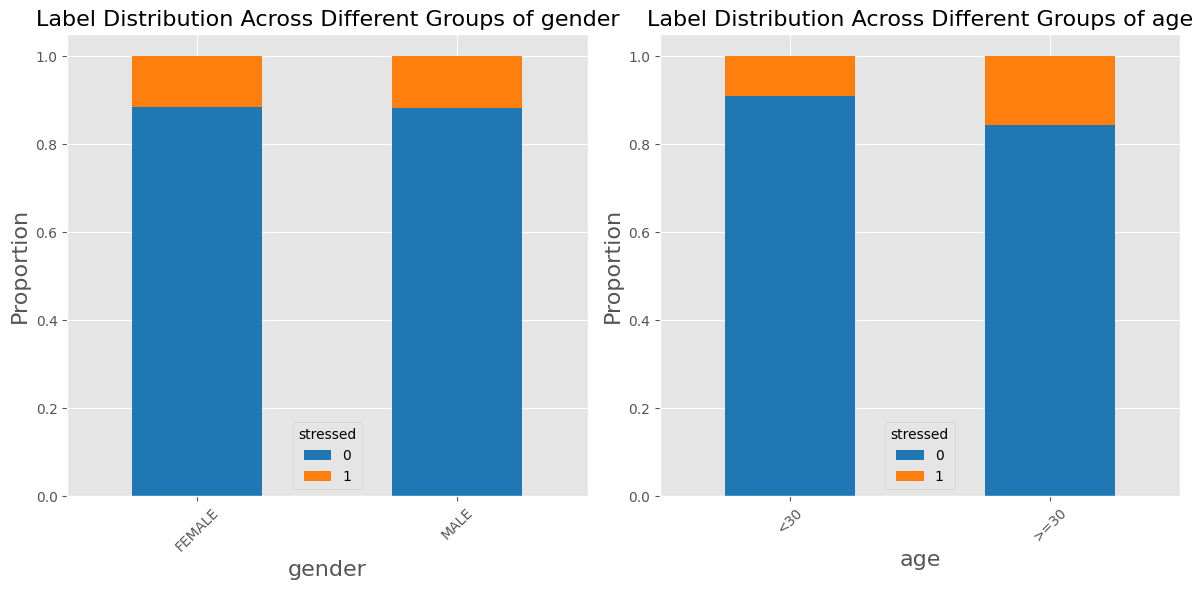

In [25]:
import matplotlib.pyplot as plt

# Define the protected attribute and target label columns for gender
protected_attribute_gender = 'gender'
target_label_gender = 'labels'

custom_palette = ['#1f77b4', '#ff7f0e'] 

# Calculate label distribution for each group of the protected attribute (gender)
label_distribution_gender = df.groupby(protected_attribute_gender)[target_label_gender].value_counts(normalize=True).unstack()

# Define the protected attribute and target label columns for age
protected_attribute_age = 'age'
target_label_age = 'labels'

# Calculate label distribution for each group of the protected attribute (age)
label_distribution_age = df.groupby(protected_attribute_age)[target_label_age].value_counts(normalize=True).unstack()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize label distribution for gender
label_distribution_gender.plot(kind='bar', stacked=True, ax=axes[0], color=custom_palette)
axes[0].set_title('Label Distribution Across Different Groups of {}'.format(protected_attribute_gender), fontsize=16)
axes[0].set_xlabel(protected_attribute_gender, fontsize=16)
axes[0].set_ylabel('Proportion', fontsize=16)
axes[0].legend(title='stressed')
axes[0].tick_params(axis='x', rotation=45)

# Visualize label distribution for age
label_distribution_age.plot(kind='bar', stacked=True, ax=axes[1], color=custom_palette)
axes[1].set_title('Label Distribution Across Different Groups of {}'.format(protected_attribute_age), fontsize=16)
axes[1].set_xlabel(protected_attribute_age, fontsize=16)
axes[1].set_ylabel('Proportion', fontsize=16)
axes[1].legend(title='stressed')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Images/LifeSnaps7.png', bbox_inches='tight')
plt.show()


### Section 4: Label distribution for missing values of protected attributes

What is the distribution of labels (stressed vs. not stressed) within the subsets of data where the gender and age columns are missing?

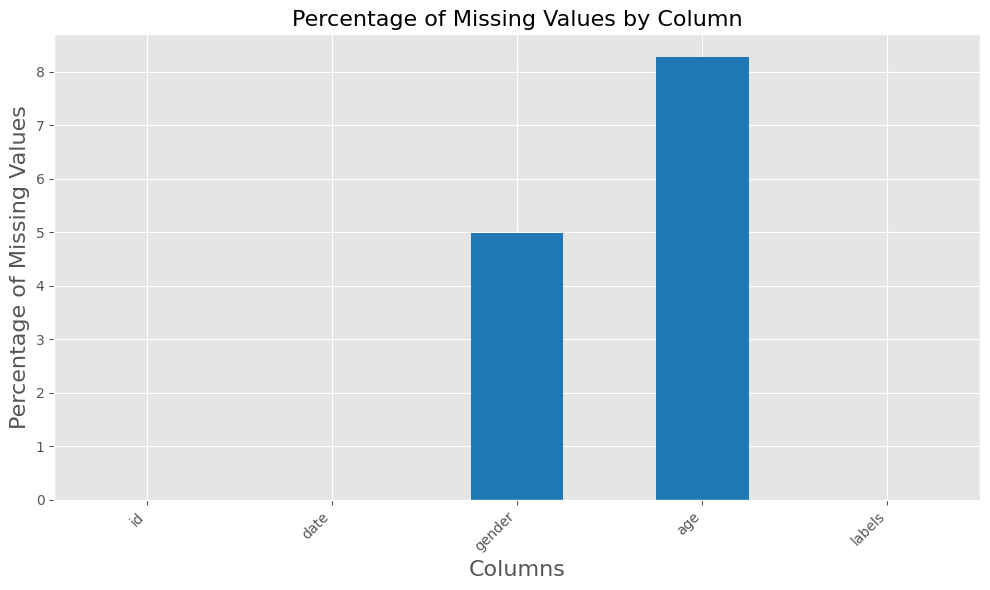

Columns with more than 3% missing values:
gender    4.993252
age       8.286100
dtype: float64


In [26]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Visualize missing value percentages
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='#1f77b4')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=16)
plt.ylabel('Percentage of Missing Values', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Images/LifeSnaps8.png', bbox_inches='tight')
plt.show()

# Identify columns with high missing value percentages
threshold = 3  # You can adjust the threshold as needed
high_missing_columns = missing_percentage[missing_percentage > threshold]
print('Columns with more than {}% missing values:'.format(threshold))
print(high_missing_columns)

In [27]:
# Filter the DataFrame to include only rows where the gender column is NaN
missing_gender_df = df[df['gender'].isna()]

# Count the number of "stressed" and "not stressed" labels in the subset
label_counts = missing_gender_df['labels'].value_counts()
label_counts

0    353
1     17
Name: labels, dtype: int64

In [28]:
# Filter the DataFrame to include only rows where the gender column is NaN
missing_gender_df = df[df['age'].isna()]

# Count the number of "stressed" and "not stressed" labels in the subset
label_counts = missing_gender_df['labels'].value_counts()
label_counts

0    596
1     18
Name: labels, dtype: int64

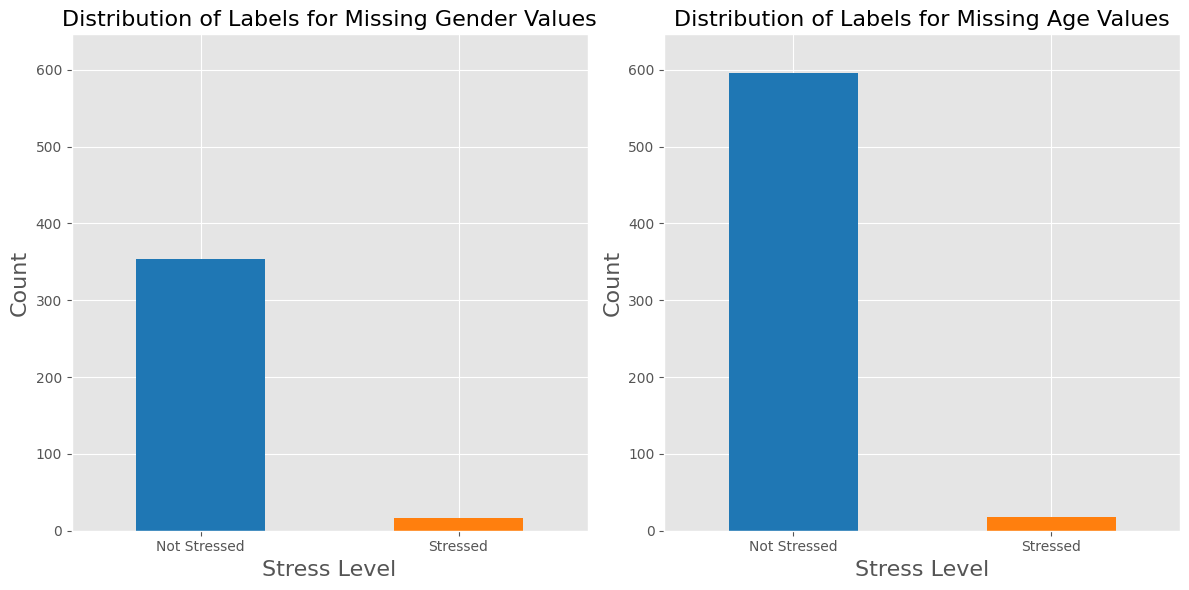

In [30]:
import matplotlib.pyplot as plt

custom_palette = ['#1f77b4', '#ff7f0e']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Filter the DataFrame to include only rows where the gender column is NaN
missing_gender_df = df[df['gender'].isna()]

# Count the number of "stressed" and "not stressed" labels in the subset
gender_label_counts = missing_gender_df['labels'].value_counts()

# Visualize the distribution of labels for missing gender values
gender_label_counts.plot(kind='bar', ax=axes[0], color=custom_palette)
axes[0].set_title('Distribution of Labels for Missing Gender Values', fontsize=16)
axes[0].set_xlabel('Stress Level', fontsize=16)
axes[0].set_ylabel('Count', fontsize=16)
axes[0].set_xticklabels(['Not Stressed', 'Stressed'], rotation=0)

# Filter the DataFrame to include only rows where the age column is NaN
missing_age_df = df[df['age'].isna()]

# Count the number of "stressed" and "not stressed" labels in the subset
age_label_counts = missing_age_df['labels'].value_counts()

# Visualize the distribution of labels for missing age values
age_label_counts.plot(kind='bar', ax=axes[1], color=custom_palette)
axes[1].set_title('Distribution of Labels for Missing Age Values', fontsize=16)
axes[1].set_xlabel('Stress Level', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)
axes[1].set_xticklabels(['Not Stressed', 'Stressed'], rotation=0)

# Set the same y-axis limit for both subplots
max_count = max(gender_label_counts.max(), age_label_counts.max())
for ax in axes:
    ax.set_ylim(0, max_count + 50)

plt.tight_layout()
plt.savefig('Images/LifeSnaps9.png', bbox_inches='tight')
plt.show()


## Data representation biases after preprocessing

### Data Preprocessing

In [31]:
df = pd.read_csv('Final_CSVs/daily_fitbit_sema_df_unprocessed.csv')
df

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,daily_temperature_variation,badgeType,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,-1.788325,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,-2.462709,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,-2.385801,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,-2.124199,['LIFETIME_DISTANCE'],...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,-2.396873,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7406,7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7407,7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7408,7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df["labels"] = np.where(df['TENSE/ANXIOUS']==1, 1, np.where(df['ALERT']==1,1, np.where(df['SAD']==1,1, 0)))
df["labels"].value_counts()

0    6571
1     839
Name: labels, dtype: int64

In [33]:
df = df[['id', 'date', 'gender', 'age', 'labels']]
df

,id,date,gender,age,labels
0,621e2e8e67b776a24055b564,2021-05-24,MALE,<30,0
1,621e2e8e67b776a24055b564,2021-05-25,MALE,<30,0
2,621e2e8e67b776a24055b564,2021-05-26,MALE,<30,0
3,621e2e8e67b776a24055b564,2021-05-27,MALE,<30,0
4,621e2e8e67b776a24055b564,2021-05-28,MALE,<30,0
...,...,...,...,...,...
7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,0
7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,0
7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,0
7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,0


In [34]:
from sklearn.impute import SimpleImputer

# Only categorical features have missing values (gender and age)
categorical_features = df.select_dtypes(include='object').columns

# Impute missing values for categorical features
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_categorical.fit_transform(df[categorical_features])

C:\Users\alexi\AppData\Local\Temp\ipykernel_14992\1086251246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_features] = imputer_categorical.fit_transform(df[categorical_features])


In [35]:
df

,id,date,gender,age,labels
0,621e2e8e67b776a24055b564,2021-05-24,MALE,<30,0
1,621e2e8e67b776a24055b564,2021-05-25,MALE,<30,0
2,621e2e8e67b776a24055b564,2021-05-26,MALE,<30,0
3,621e2e8e67b776a24055b564,2021-05-27,MALE,<30,0
4,621e2e8e67b776a24055b564,2021-05-28,MALE,<30,0
...,...,...,...,...,...
7405,621e362467b776a2404ad513,2021-05-18,MALE,<30,0
7406,621e36f967b776a240e5e7c9,2021-05-20,MALE,<30,0
7407,621e362467b776a2404ad513,2021-05-23,MALE,<30,0
7408,621e339967b776a240e502de,2021-11-19,MALE,<30,0


### Section #1: Representation of the real world population
Is the dataset sample representative of the real-world population?

#### Gender

In [36]:
# real population distribution in 2021 (LifeSnaps data collection year) in Europe
real_distribution = {
    "gender": {'MALE': 48.16, 'FEMALE': 51.84}, # 0: male, 1: female (https://www.statista.com/statistics/755225/population-of-europe-by-gender/)
}
real_distribution

{'gender': {'MALE': 48.16, 'FEMALE': 51.84}}

In [37]:
# dataset population distribution in 2021 (LifeSnaps data collection year) in Europe
lifesnaps_distribution = {
    "gender": {'MALE': 0, 'FEMALE': 1}, # 0: male, 1: female
}

# unique users
df_p1 = df.groupby(['id']).first().reset_index()

for attribute in real_distribution:
    counts = df_p1[attribute].value_counts()
    lifesnaps_distribution.get(attribute).update(counts)
lifesnaps_distribution

{'gender': {'MALE': 45, 'FEMALE': 26}}

In [38]:
# compute the ratio for the gender
real_ratio = list(real_distribution.get('gender').values())[0] / list(real_distribution.get('gender').values())[1]
dataset_ratio = list(lifesnaps_distribution.get('gender').values())[0] / list(lifesnaps_distribution.get('gender').values())[1]
real_ratio, dataset_ratio

(0.9290123456790123, 1.7307692307692308)

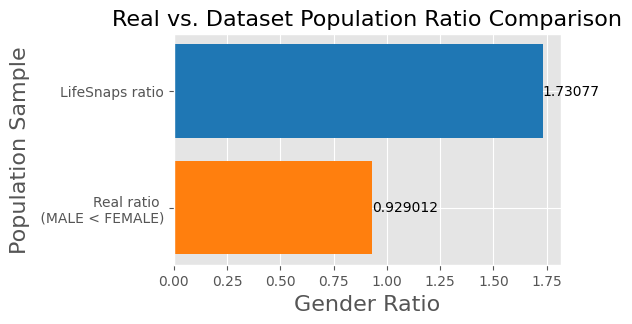

In [39]:
y = ['Real ratio \n (MALE < FEMALE)', 'LifeSnaps ratio']
x = [real_ratio, dataset_ratio]
f, ax = plt.subplots()
f.set_figwidth(5)
f.set_figheight(3)
bars = ax.barh(y,x, color=['#ff7f0e', '#1f77b4'])
ax.bar_label(bars)
plt.ylabel('Population Sample', fontsize=16)
plt.xlabel('Gender Ratio', fontsize=16)
plt.title('Real vs. Dataset Population Ratio Comparison', fontsize=16)
plt.savefig('Images/LifeSnaps1_preprocessed.png', bbox_inches='tight')
plt.show()

#### Age Ratio

In [40]:
# real population distribution in 2021 (LifeSnaps data collection year) in Europe
real_distribution = {
    "age": {'<30': 31.79, '>=30': 68.21}, # 0: <30, 1: >=30 (https://www.census.gov/data-tools/demo/idb/#/dashboard?COUNTRY_YEAR=2021&COUNTRY_YR_ANIM=2021&CCODE_SINGLE=*W&CCODE=*W)
}
real_distribution

{'age': {'<30': 31.79, '>=30': 68.21}}

In [41]:
# dataset population distribution in 2021 (LifeSnaps data collection year) in the world
lifesnaps_distribution = {
    "age": {'<30': 0, '>=30': 1}, # 0: <30, 1: >=30
}

# unique users
df_p1 = df.groupby(['id']).first().reset_index()

for attribute in real_distribution:
    counts = df_p1[attribute].value_counts()
    lifesnaps_distribution.get(attribute).update(counts)
lifesnaps_distribution

{'age': {'<30': 41, '>=30': 30}}

In [42]:
# compute the ratio for the age
real_ratio = list(real_distribution.get('age').values())[0] / list(real_distribution.get('age').values())[1]
dataset_ratio = list(lifesnaps_distribution.get('age').values())[0] / list(lifesnaps_distribution.get('age').values())[1]
real_ratio, dataset_ratio

(0.4660606949127694, 1.3666666666666667)

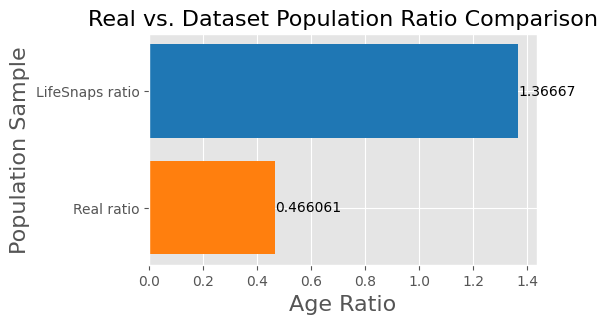

In [43]:
y = ['Real ratio', 'LifeSnaps ratio']
x = [real_ratio, dataset_ratio]
f, ax = plt.subplots()
f.set_figwidth(5)
f.set_figheight(3)
bars = ax.barh(y,x, color=['#ff7f0e', '#1f77b4'])
ax.bar_label(bars)
plt.ylabel('Population Sample', fontsize=16)
plt.xlabel('Age Ratio', fontsize=16)
plt.title('Real vs. Dataset Population Ratio Comparison', fontsize=16)
plt.savefig('images/LifeSnaps2_preprocessed.png', bbox_inches='tight')
plt.show()

### Section #2: Underrepresented populations
Are there underrepresented populations in the dataset?

In [44]:
# number of samples per protected attribute
representation_df = pd.DataFrame(columns=['Class', 'Samples', 'Attribute'])
for attribute in ['gender', 'age']:
    attribute_df = df_p1[attribute].value_counts().reset_index(drop=False)
    attribute_name = attribute_df.columns[0]
    attribute_df.rename(columns={attribute_df.columns[0]: 'Class', attribute_df.columns[1]: 'Samples'}, inplace=True)
    attribute_df['Attribute'] = attribute
    representation_df = pd.concat([representation_df, attribute_df], axis=0)
representation_df

,Class,Samples,Attribute
0,MALE,45,gender
1,FEMALE,26,gender
0,<30,41,age
1,>=30,30,age


In [45]:
# Data setup
representation_df = pd.DataFrame({
    'Class': ['MALE', 'FEMALE', '<30', '>=30'],
    'Samples': [45, 26, 41, 30],
    'Attribute': ['gender', 'gender', 'age', 'age']
})
representation_df

,Class,Samples,Attribute
0,MALE,45,gender
1,FEMALE,26,gender
2,<30,41,age
3,>=30,30,age


C:\Users\alexi\AppData\Local\Temp\ipykernel_14992\4231759601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=['#1f77b4', '#ff7f0e'], aspect=.5)
C:\Users\alexi\AppData\Local\Temp\ipykernel_14992\4231759601.py:2: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=['#1f77b4', '#ff7f0e'], aspect=.5)


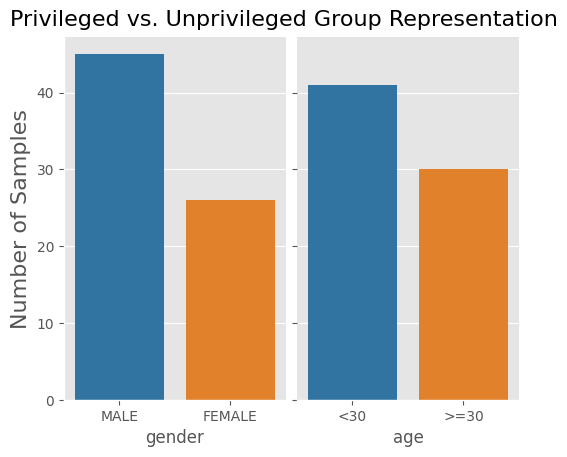

In [46]:
# create the plot to visualize the samples per class per protected attribute
g = sns.catplot(data=representation_df, x="Class", col="Attribute", y="Samples", kind='bar', sharex=False, palette=['#1f77b4', '#ff7f0e'], aspect=.5)
g.set_titles("{col_name}", fontsize=16)
g.set_ylabels('Number of Samples', fontsize=16)
plt.suptitle("Privileged vs. Unprivileged Group Representation", fontsize=16)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
# for c in g.axes.flat[0].containers:
#     labels = [int(v.get_height()) for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')
plt.subplots_adjust(wspace=0.05, bottom=0.2, left=0.06)
plt.savefig('Images/LifeSnaps3_preprocessed.png', bbox_inches='tight')
plt.show()

In [47]:
# examine the representation on the LifeSnaps dataset based on the intersectionality of age and gender
df_intersectionality = pd.DataFrame(df_p1.groupby(['age', 'gender']).count().reset_index())
df_intersectionality = df_intersectionality[['age', 'gender', 'id']]
df_intersectionality.rename(columns={'id': 'Samples'}, inplace=True)
df_intersectionality['Group'] = ['FEMALE <30', 'MALE <30', 'FEMALE >=30', 'MALE >=30']
df_intersectionality.drop(columns=['age', 'gender'], inplace=True)
df_intersectionality

,Samples,Group
0,14,FEMALE <30
1,27,MALE <30
2,12,FEMALE >=30
3,18,MALE >=30


C:\Users\alexi\AppData\Local\Temp\ipykernel_14992\499958273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_intersectionality, x="Group", y="Samples", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], aspect=.8)


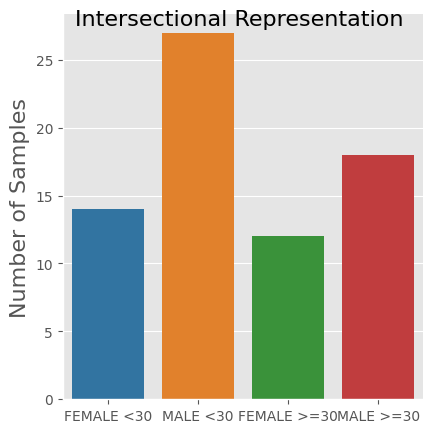

In [48]:
# create the plot to visualize the samples per class per protected attribute
g = sns.catplot(data=df_intersectionality, x="Group", y="Samples", kind='bar', sharex=False, palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], aspect=.8)
g.set_titles("{col_name}", fontsize=16)
g.set_ylabels('Number of Samples', fontsize=16)
plt.suptitle("Intersectional Representation", fontsize=16)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
# for c in g.axes.flat[0].containers:
#     labels = [int(v.get_height()) for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')
plt.subplots_adjust(wspace=0.05, bottom=0.2, left=0.06)
plt.savefig('Images/LifeSnaps4_preprocessed.png', bbox_inches='tight')
plt.show()

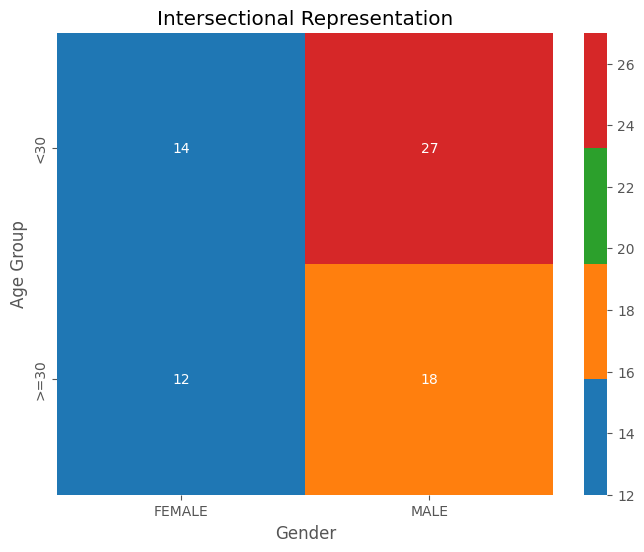

In [49]:
from matplotlib.colors import ListedColormap

data = {
    'age': ['<30', '<30', '>=30', '>=30'],
    'gender': ['FEMALE', 'MALE', 'FEMALE', 'MALE'],
    'Samples': [14, 27, 12, 18]  # Sample counts for each combination of age and gender
}

# Create a DataFrame from the sample data
df_intersectionality = pd.DataFrame(data)

# Pivot the DataFrame to have age and gender as rows and columns respectively
pivot_df = df_intersectionality.pivot(index='age', columns='gender', values='Samples')

# Define the colors for the heatmap
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create the heatmap with the specified colors
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap=ListedColormap(custom_palette), fmt='d')
plt.title('Intersectional Representation')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.savefig('Images/LifeSnaps5_preprocessed.png', bbox_inches='tight')
plt.show()


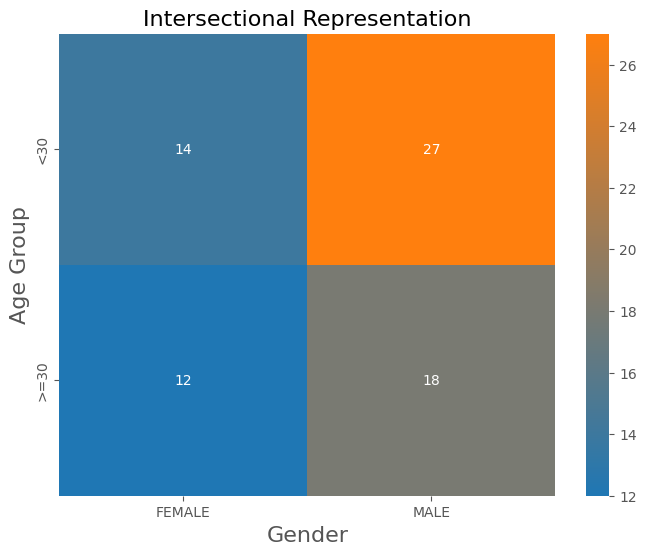

In [50]:
import matplotlib.colors as mcolors

data = {
    'age': ['<30', '<30', '>=30', '>=30'],
    'gender': ['FEMALE', 'MALE', 'FEMALE', 'MALE'],
    'Samples': [14, 27, 12, 18]  # Sample counts for each combination of age and gender
}

# Create a DataFrame from the sample data
df_intersectionality = pd.DataFrame(data)

# Pivot the DataFrame to have age and gender as rows and columns respectively
pivot_df = df_intersectionality.pivot(index='age', columns='gender', values='Samples')

# Define your start and end colors
start_color = "#1f77b4"
end_color = "#ff7f0e"

# Create a custom colormap using LinearSegmentedColormap
colors = [start_color, end_color]
cmap_name = 'custom_gradient'
n_bins = 1000  # Use a large number of bins for smooth color transition
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create the heatmap using the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap=cmap, fmt='d')
plt.title('Intersectional Representation', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Age Group', fontsize=16)
plt.savefig('Images/LifeSnaps5_preprocessed.png', bbox_inches='tight')
plt.show()


### Section #3: Label Distribution Across Protected Attribute Groups

Are there are any disparities in the distribution of the target label (stressed vs. not stressed) across different groups of the protected attribute (e.g., gender, age)?

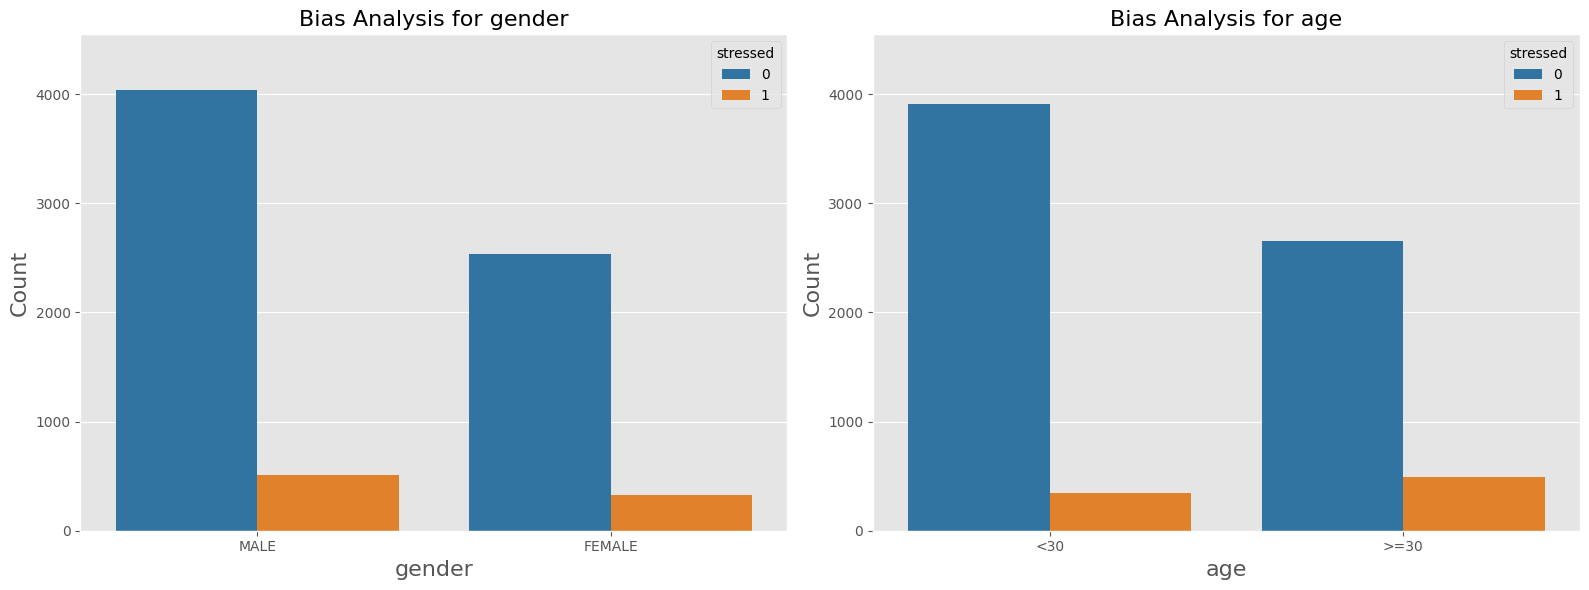

In [51]:
# Define the columns for analysis
columns_for_bias_analysis = ['gender', 'age']

# Define the target label column
target_label = 'labels'

custom_palette= ['#1f77b4', '#ff7f0e']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Initialize y-axis limits
y_max = 0

# Visualize bias in each column
for i, column in enumerate(columns_for_bias_analysis):
    sns.countplot(x=column, hue=target_label, data=df, ax=axes[i], palette=custom_palette)
    axes[i].set_title('Bias Analysis for {}'.format(column), fontsize=16)
    axes[i].set_xlabel(column, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].legend(title='stressed')
    
    # Update y-axis limits
    current_max = df[column].value_counts().max()
    if current_max > y_max:
        y_max = current_max

# Set the same y-axis limits for both plots
for ax in axes:
    ax.set_ylim(0, y_max)

plt.tight_layout()
plt.savefig('Images/LifeSnaps6_preprocessed.png', bbox_inches='tight')
plt.show()

In [52]:
# Define the protected attribute and target label columns
protected_attribute = 'gender'
target_label = 'labels'

# Calculate label distribution for each group of the protected attribute
label_distribution = df.groupby(protected_attribute)[target_label].value_counts(normalize=True).unstack()
label_distribution

labels,0,1
gender,,
FEMALE,0.885045,0.114955
MALE,0.887863,0.112137


In [53]:
# Define the protected attribute and target label columns
protected_attribute = 'age'
target_label = 'labels'

# Calculate label distribution for each group of the protected attribute
label_distribution = df.groupby(protected_attribute)[target_label].value_counts(normalize=True).unstack()
label_distribution

labels,0,1
age,,
<30,0.919173,0.080827
>=30,0.843056,0.156944


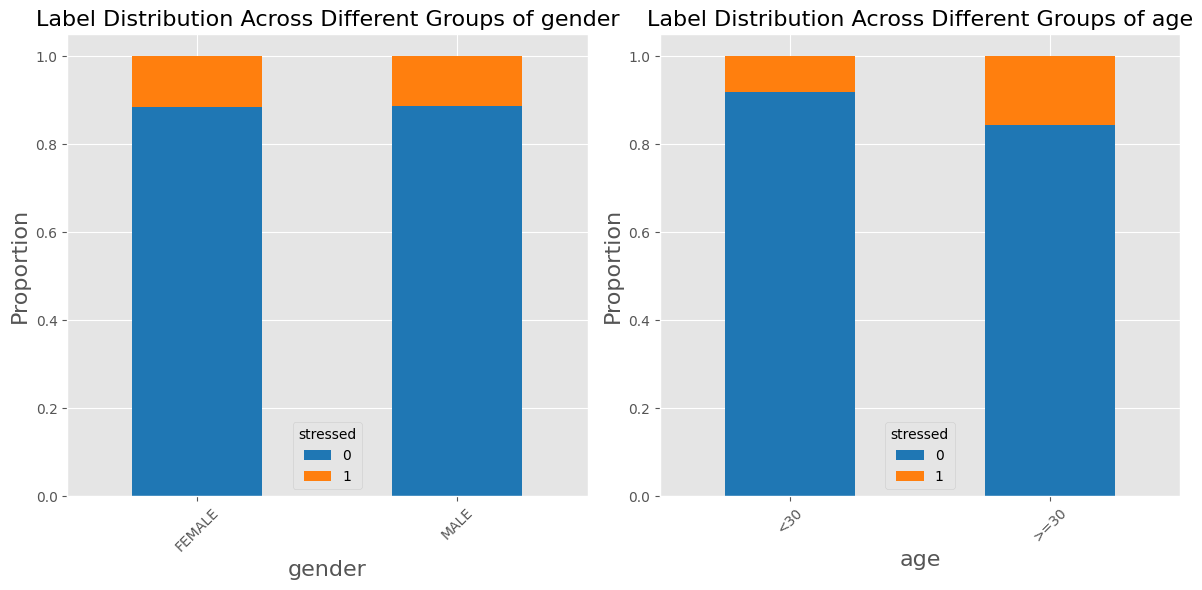

In [54]:
import matplotlib.pyplot as plt

# Define the protected attribute and target label columns for gender
protected_attribute_gender = 'gender'
target_label_gender = 'labels'

custom_palette = ['#1f77b4', '#ff7f0e']

# Calculate label distribution for each group of the protected attribute (gender)
label_distribution_gender = df.groupby(protected_attribute_gender)[target_label_gender].value_counts(normalize=True).unstack()

# Define the protected attribute and target label columns for age
protected_attribute_age = 'age'
target_label_age = 'labels'

# Calculate label distribution for each group of the protected attribute (age)
label_distribution_age = df.groupby(protected_attribute_age)[target_label_age].value_counts(normalize=True).unstack()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize label distribution for gender
label_distribution_gender.plot(kind='bar', stacked=True, ax=axes[0], color=custom_palette)
axes[0].set_title('Label Distribution Across Different Groups of {}'.format(protected_attribute_gender), fontsize=16)
axes[0].set_xlabel(protected_attribute_gender, fontsize=16)
axes[0].set_ylabel('Proportion', fontsize=16)
axes[0].legend(title='stressed')
axes[0].tick_params(axis='x', rotation=45)

# Visualize label distribution for age
label_distribution_age.plot(kind='bar', stacked=True, ax=axes[1], color=custom_palette)
axes[1].set_title('Label Distribution Across Different Groups of {}'.format(protected_attribute_age), fontsize=16)
axes[1].set_xlabel(protected_attribute_age, fontsize=16)
axes[1].set_ylabel('Proportion', fontsize=16)
axes[1].legend(title='stressed')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Images/LifeSnaps7_preprocessed.png', bbox_inches='tight')
plt.show()


### Section 4: Label distribution for missing values of protected attributes

What is the distribution of labels (stressed vs. not stressed) within the subsets of data where the gender and age columns are missing?

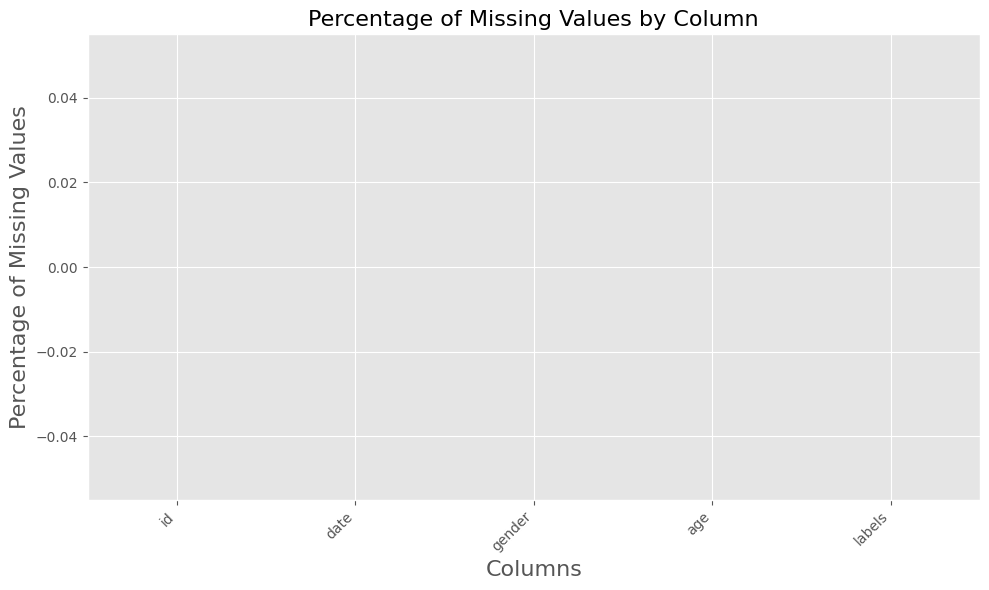

Columns with more than 3% missing values:
Series([], dtype: float64)


In [55]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Visualize missing value percentages
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='#1f77b4')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=16)
plt.ylabel('Percentage of Missing Values', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify columns with high missing value percentages
threshold = 3  # You can adjust the threshold as needed
high_missing_columns = missing_percentage[missing_percentage > threshold]
print('Columns with more than {}% missing values:'.format(threshold))
print(high_missing_columns)